# Prediksi Tipe Kanker (Malignant atau Benign) Prostat dengan Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# sumber original: https://www.kaggle.com/datasets/sajidsaifi/prostate-cancer
cancer = pd.read_csv("https://raw.githubusercontent.com/khalidrizki/ProstateCancer/main/Prostate_Cancer.csv")
cancer.drop('id', axis=1, inplace=True)
cancer.head(10)

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097
4,M,9,19,135,1297,0.141,0.133,0.181,0.059
5,B,25,25,83,477,0.128,0.170,0.209,0.076
6,M,16,26,120,1040,0.095,0.109,0.179,0.057
7,M,15,18,90,578,0.119,0.165,0.220,0.075
8,M,19,24,88,520,0.127,0.193,0.235,0.074
9,M,25,11,84,476,0.119,0.240,0.203,0.082


## Data Exploration

In [ ]:
# Check null values
cancer.isna().sum()

diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

Seperti terlihat di atas, data kita tidak memiliki null values

In [ ]:
# Membuat list nama kolom dari features
columns = list(cancer.iloc[:,1:].columns)
columns

['radius',
 'texture',
 'perimeter',
 'area',
 'smoothness',
 'compactness',
 'symmetry',
 'fractal_dimension']

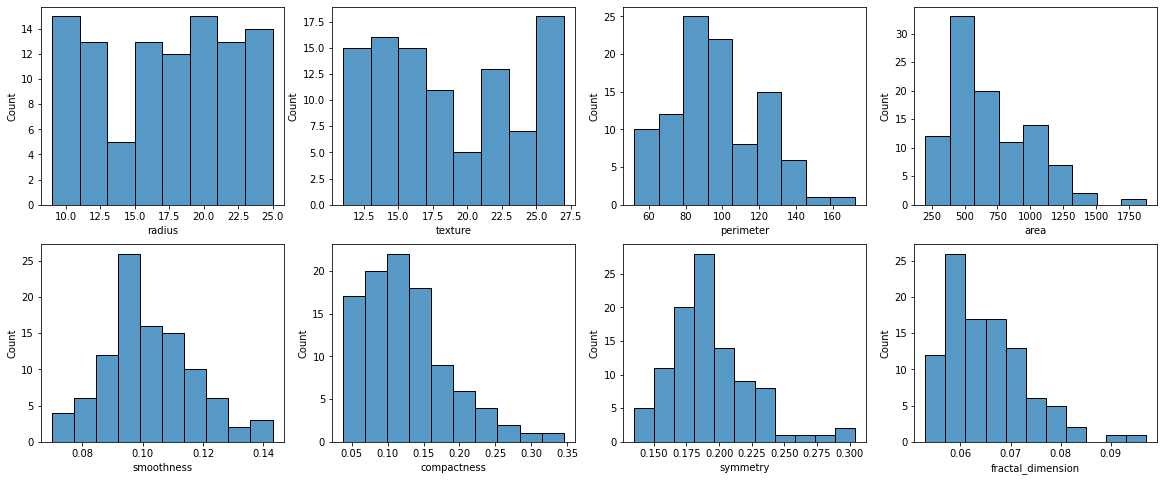

In [ ]:
# Cek jika ada outlier
fig,ax = plt.subplots(2,4, figsize=(20,8))
ax = ax.flatten()

for i,column in enumerate(columns):
  sns.histplot(data=cancer, x=column, ax=ax[i])

Seperti terlihat pada kumpulan histogram di atas, data kita tidak memiliki outlier

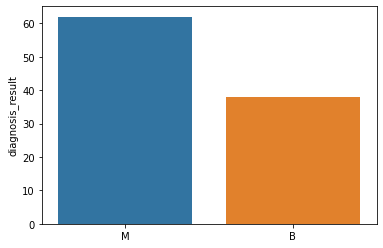

M    62
B    38
Name: diagnosis_result, dtype: int64


In [ ]:
# Melihat distribusi dari masing-masing kelas target
sns.barplot(x=cancer['diagnosis_result'].value_counts().index, y=cancer['diagnosis_result'].value_counts())
plt.show()
print(cancer['diagnosis_result'].value_counts())

Dapat dilihat bahwa distribusi kelas 'Malignant/Ganas' dan 'Benign/Jinak' tidak berimbang

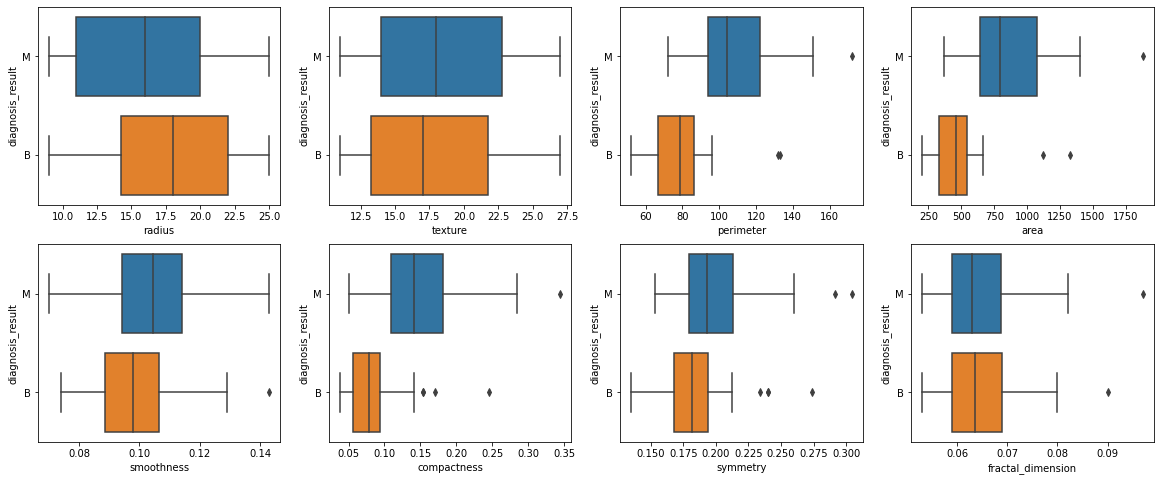

In [ ]:
# Lihat korelasi tiap fitur terhadap diagnosis_result
fig,ax = plt.subplots(2,4, figsize=(20,8))
ax = ax.flatten()

for i,column in enumerate(columns):
  sns.boxplot(data=cancer, x=column, y='diagnosis_result', ax=ax[i])

## Preprocessing

In [ ]:
# Memisahkan features ke dataframe terpisah bernama 'X_unscaled', yakni X yang belum distandardisasi
X_unscaled = cancer.iloc[:, 1:]
X_unscaled.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,23,12,151,954,0.143,0.278,0.242,0.079
1,9,13,133,1326,0.143,0.079,0.181,0.057
2,21,27,130,1203,0.125,0.160,0.207,0.060
3,14,16,78,386,0.070,0.284,0.260,0.097
4,9,19,135,1297,0.141,0.133,0.181,0.059


In [ ]:
# Standardization
def Standardize(dataframe, nama_kolom):
  return (dataframe[nama_kolom]-dataframe[nama_kolom].mean())/(dataframe[nama_kolom].std())

# Membuat dataframe features yang distandarisasi
X = pd.DataFrame()
for column in columns:
  X[column] = Standardize(X_unscaled, column)

X.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1.260480,-1.199703,2.290074,0.785460,2.750354,2.474504,1.586160,1.755620
1,-1.608905,-1.007134,1.529814,1.949011,2.750354,-0.780131,-0.395322,-0.943446
2,0.850568,1.688827,1.403103,1.564288,1.520993,0.544620,0.449244,-0.575392
3,-0.584125,-0.429428,-0.793205,-0.991145,-2.235388,2.572634,2.170860,3.963946
4,-1.608905,0.148278,1.614287,1.858304,2.613758,0.103036,-0.395322,-0.698077


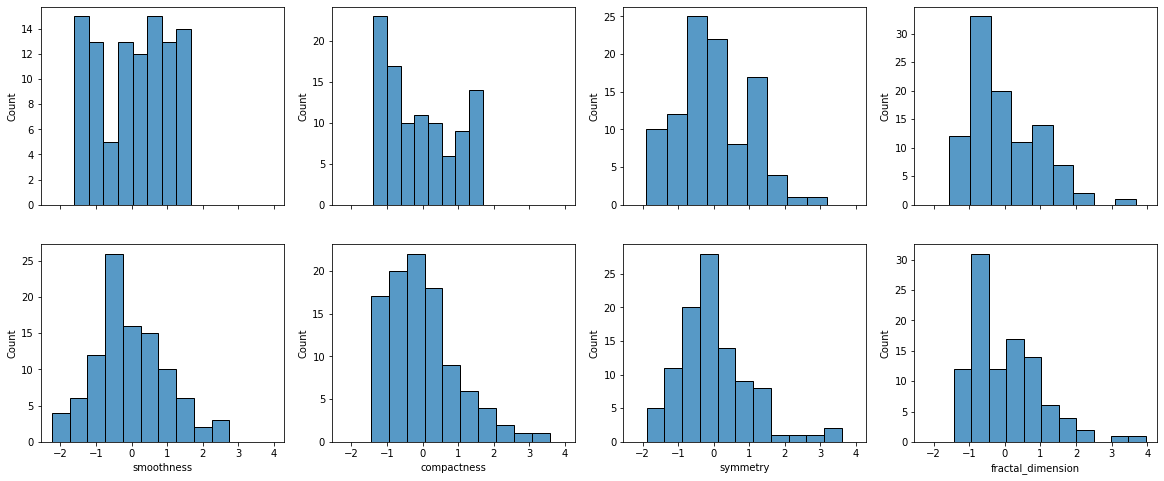

In [ ]:
# Dapat dilihat bahwa data telah distandarisasi/dinormalisasi
fig,ax = plt.subplots(2,4, figsize=(20,8), sharex=True)
ax = ax.flatten()

for i,column in enumerate(columns):
  sns.histplot(data=X, x=column, ax=ax[i])

In [ ]:
# Label encoding pada target, 'diagnosis_result'
# y berperan sebagai target
y = np.where(cancer['diagnosis_result']=='M', 1, 0)
y

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1])

## Modelling

In [ ]:
# Memisahkan X dan y menjadi train set dan test set
from sklearn.model_selection import train_test_split  
X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.1, random_state=1)

In [ ]:
# Melihat distribusi Malignant-Benign pada train set
print('distribusi train set:')
print(pd.Series(y_tr).value_counts())
print()

# Melihat distribusi Malignant-Benign pada test set
print('distribusi test set:')
print(pd.Series(y_te).value_counts())

distribusi train set:
1    57
0    33
dtype: int64

distribusi test set:
0    5
1    5
dtype: int64


In [ ]:
class LogisticRegression:
    def sigmoid(self,z):
        """"""
        sig = 1/(1+np.exp(-z))
        return sig

    def initialize(self,X):
        weights = np.zeros((X.shape[1]+1,1))
        X = np.c_[np.ones((X.shape[0],1)),X]
        return weights,X

    def fit(self,X,y,alpha=0.001,iter=1000):
        """Meng-fit kan model pada data training"""
        weights,X = self.initialize(X) # weights itu vektor, X itu matriks

        def cost(theta):
            """Cost function, untuk melihat error model pada tiap iterasi"""
            a = X @ theta
            y_topi = self.sigmoid(a)
            cost0 = y.T @ np.log(y_topi)
            cost1 = (1-y).T @ np.log(1-y_topi)
            cost = -np.mean((cost1 + cost0))
            return cost # skalar

        cost_list = np.zeros(iter) # vektor
        for i in range(iter):
            z = X @ weights
            
            y_hat = self.sigmoid(z)
            weights = weights - alpha * (X.T @ (y_hat - np.reshape(y,(len(y),1))))
            cost_list[i] = cost(weights)
        self.weights = weights # vektor

    def predict(self,X):
        """"Memprediksi y berdasarkan input X"""
        z = self.initialize(X)[1] @ self.weights
        lis = []
        for i in self.sigmoid(z):
            if i>0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis

In [ ]:
model = LogisticRegression()
model.fit(X_tr, y_tr)

## Uji Model

In [ ]:
y_pred = model.predict(X_te)
y_train = model.predict(X_tr)

In [ ]:
pd.DataFrame({'y_te sesungguhnya':y_te, 'y prediksi':y_pred})

,y_te sesungguhnya,y prediksi
0,0,0
1,0,0
2,1,1
3,0,1
4,0,1
5,1,1
6,1,1
7,1,1
8,0,0
9,1,1


In [ ]:
def F1_score(y,y_hat):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return f1_score

In [ ]:
f1_score_tr = F1_score(y_tr,y_train)
f1_score_te = F1_score(y_te,y_pred)
print('F1 score utk data train:', f1_score_tr)
print('F1 score utk data test:', f1_score_te)

F1 score utk data train: 0.9122807017543859
F1 score utk data test: 0.8333333333333333


Dapat dilihat bahwa skor F1 untuk prediksi data training lebih tinggi daripada prediksi data test. Hal ini sudah sepatutnya terjadi karena data training ini adalah data yang digunakan model untuk belajar, sedangkan data test adalah data yang belum pernah dilihat oleh model sebelumnya. 